4.6\. Use broadcasting to create a grid of distances (15 MINUTES)

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [3]:
import numpy as np
import pandas as pd
import math as m

# definiton of a list and an array for cities and distances in miles
cities = ["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"]
positions_miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

# conversion of the miles in kilometers
positions_km = positions_miles * 1.60934

# building the grid of distances along the route 66 
grid_distances = np.abs(positions_km[:, np.newaxis] - positions_km)
df_distances = pd.DataFrame(grid_distances, index=cities, columns=cities)
print(f"the grid of distances (in km) for the route-66 is:\n {df_distances}")

the grid of distances (in km) for the route-66 is:
                   Chicago  Springfield  Saint-Louis       Tulsa  \
Chicago           0.00000    318.64932    487.63002  1184.47424   
Springfield     318.64932      0.00000    168.98070   865.82492   
Saint-Louis     487.63002    168.98070      0.00000   696.84422   
Tulsa          1184.47424    865.82492    696.84422     0.00000   
Oklahoma City  1401.73514   1083.08582    914.10512   217.26090   
Amarillo       1890.97450   1572.32518   1403.34448   706.50026   
Santa Fe       2373.77650   2055.12718   1886.14648  1189.30226   
Albuquerque    2484.82096   2166.17164   1997.19094  1300.34672   
Flagstaff      3078.66742   2760.01810   2591.03740  1894.19318   
Los Angeles    3939.66432   3621.01500   3452.03430  2755.19008   

               Oklahoma City    Amarillo    Santa Fe  Albuquerque   Flagstaff  \
Chicago           1401.73514  1890.97450  2373.77650   2484.82096  3078.66742   
Springfield       1083.08582  1572.32518  2055.1

## Pandas analysis (60 MINUTES)

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

The number of units of BX_COUNTER for each unit of ORBIT_COUNT is: 3564
Taking the data for the first N rows required: 980406479.1666666 ns
>The 3 most noisy channels are: TDC_CHANNEL
139            59741
64             36746
63             35735
Name: count, dtype: int64
11000
number of unique orbits with at least one meas from ch 139: 10870


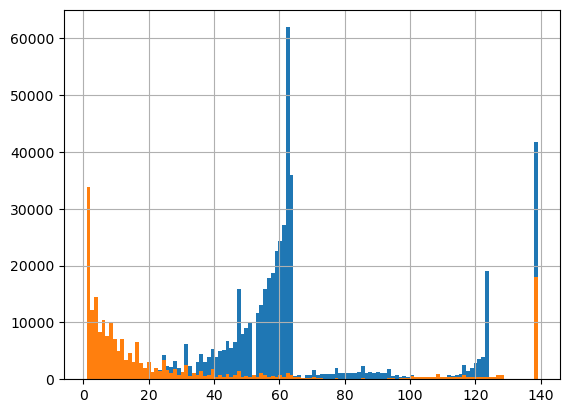

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# selecting a number N such that: n <= N <= max_rows_number
M = 10000
columns = ['HEAD', 'FPGA', 'TDC_CHANNEL', 'ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS']
full_data = pd.read_csv('C:\\Users\\NickBello\\Desktop\\phyton_shit\\data_000637.txt', sep=',', skiprows=1, names=columns, header=None)
max_rows = len(full_data)
N = random.randint(M+1, max_rows)

# creating a dataframe reading and working with only the first N rows
DataFrame = full_data.sample(n=N)

# timing informations
TDC_count = 25/30 # ns
BX_COUNTER = 25   # ns

# finding the units of BX_COUNTER in a single unit of ORBIT_COUNT
x = DataFrame["BX_COUNTER"].max() + 1
print(f"The number of units of BX_COUNTER for each unit of ORBIT_COUNT is: {x}")

# total time of the data collection for the first N rows and added a column to the dataset
DataFrame['SIMULATION_TIME'] = (DataFrame["TDC_MEAS"]*TDC_count + DataFrame["BX_COUNTER"]*25 + (DataFrame["ORBIT_CNT"]-DataFrame["ORBIT_CNT"].min())*x*25)
total_time = DataFrame["SIMULATION_TIME"].max() - DataFrame["SIMULATION_TIME"].min()
print(f"Taking the data for the first N rows required: {total_time} ns")

# replacing HEAD=1 randomly with 0 and 1
DataFrame['HEAD'] = pd.Series(np.random.randint(2, size=N), index=DataFrame.index)

# new dataframe with only the rows with HEAD==True
new_df = DataFrame[DataFrame['HEAD']==True]

#plotting
(DataFrame.groupby("FPGA"))["TDC_CHANNEL"].hist(bins=120)
pcc = DataFrame.value_counts(subset=['TDC_CHANNEL'])
print(f">The 3 most noisy channels are: {pcc[:3]}")

# unique orbit
unique_orbit = DataFrame['ORBIT_CNT'].nunique()
print(unique_orbit)

filtered_data = (DataFrame[DataFrame['TDC_CHANNEL'] == 139])['ORBIT_CNT'].nunique()
print('number of unique orbits with at least one meas from ch 139:', filtered_data)


10.3\. **Monte Carlo integration: hit/miss vs mean value method** (30 MINUTES)

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [3]:
import numpy as np

def f(x): return (np.sin(1/(x*(2-x))))**2

delta_x = 2-0
delta_y = 1-0

N = 10**5

# hit-miss method
x, y = delta_x*np.random.random(N), delta_y*np.random.random(N)
hit = np.sum(y<f(x))
I = delta_x*delta_y*hit/N
err = delta_x*delta_y*np.sqrt(hit)/N
print('hit-miss   ->', I, '+-', err)

# mean-value method
i = delta_x*delta_y*np.sum(f(x))/N
var = delta_x*delta_y*np.var(f(x))/N
print('mean value ->', i, '+-', var)

hit-miss   -> 1.45706 +- 0.00539825897859671
mean value -> 1.4542456485130038 +- 1.3803961743443731e-06
